# Overdetermined system resolution - sugar consumption in beverages

In the process of disagregating an IO-activity (such as the beverage industry into winery, brewery, distilled beverages, softs drinks and bottled water) the following issue is frequently raised: How do we distribute the specific inputs (e.g. sugar) over the different industries?
Finding the sugar consumption in the different beverages is equivalent to solving an overdetermined system. An overdetermined system has more equations than unknowns. In this notebook, we will explore different ways to solve this overdetermined system, the solution they provide and the relative error associated with these solutions.

### Countries in Exiobase (NAM version)

The "total sugar consumption of the beverage industry" is provided in EXIOBASE for 14 countries:
- sugar = quantity of sugar consumed for all beverages (kg)

- Czech Republic (CZ)
- Germany (DE)
- Denmark (DK)
- Spain (ES)
- Finland (FI)
- France (FR)
- Ireland (IE)
- Italy (IT)
- Poland (PL)
- Sweden (SE)
- Great Britain (GB)
- United States (US)
- Canada (CA)
- Norway (NO)

Also, the volumes of each beverage type produced in the different countries were collected (extracted from industry associations):
- wine = volume of wine (L)
- beer = volume of beer (L)
- cider = volume of cider (L)
- distilled beverages = volume of distilled beverages (L)
- soft drinks = volume of soft drinks (L)
- bottled water = volume of bottled water (L)

To cross-check numbers from the different data sources, the country specific "total volume of beverages produced" registered in EXIOBASE can be compared to the sum of all volumes collected per beverge type in the same country.

### Unknowns
The unknowns are the amounts of sugar required for each beverage type:
- Sw = Sugar in wine (kg/L) => the wineries register no sugar input, so Sw = 0
- Sb = Sugar in beer (kg/L) => the breweries register no sugar input, so Sb = 0
- Sc = Sugar in cider (kg/L) => the varying sugar content of hard cider is a result of the fermentation process, sweeter ciders are slowly fermented and repeatedly racked (moved to new containers) to strain the yeast that feeds on the cider’s natural sugars.
- Sd = Sugar in distilled beverages (kg/L)
- Ss = Sugar in soft drinks (kg/L)
- Sw = Sugar in water (kg/L) => there should be no sugar in bottled water, so Sw = 0


### Equations
14 countries => so 14 equations, however we decided to exclude the equation for Canada because the volume of soft drinks in Canada (collected by Ivan) is suspiciously low compared to the sugar consumption in the beverage industry. 
=> so 13 equations

The original equation of the overtermined system was:
- Sw x wine + Sb x beer + Sc x cider + Sd x distilled beverages + Ss x soft drinks + Sw x bottled water = Sugar

We have now simplified it into:
- Sc x cider + Sd x distilled beverages + Ss x soft drinks = Sugar


## 1. Linear regressions on sugar rates and identifying outliers
First for soft drinks, then for distilled beverages, finally for cider

In [1]:
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## without removing outliers
## wo extension = with outliers
sugarwo = np.array([2.62E7,1.46E8,1.02E7,1.03E8,6.82E6,9.00E7,8.78E6,7.22E7,5.90E7,7.54E6,8.03E7,5.49E8,3.40E8,6.18E6])

wine = np.array([4.70E7,9.13E8,0,3.34E9,0,5.11E9,0,4.67E9,8.32E6,0,1.45E6,2.78E9,5.65E7,0])
beer = np.array([1.68E9,8.71E9,6.59E8,2.96E9,4.37E8,1.58E9,8.52E8,1.3E9,3.79E9,4.59E8,5.46E9,2.25E10,1.95E9,2.29E8])
ciderwo = np.array([8.09E6,8.55E7,4.49E6,6.24E7,8.21E7,1.18E8,6.84E7,0,1.57E8,1.26E7,8.97E8,3.48E7,1.65E7,1.02E7])
spiritswo = np.array([1.82E7,1.11E8,6.08E6,1.74E8,2.21E7,1.91E8,2.55E7,1.61E8,1.26E8,3.45E7,7.47E8,7.06E8,2.3E8,1.25E6])
softdrinkswo = np.array([1.75E9,9.44E9,6.94E8,6.30E9,4.09E8,5.51E9,2.96E8,3.87E9,4.25E9,5.84E8,6.46E9,4.96E10,3.53E9,5.13E8])
bottledwater = np.array([6.86E8,1.04E10,1.13E8,6.52E9,7.30E7,1.08E10,6.93E7,1.56E10,3.44E9,1.38E8,1.19E9,3.4E10,2.29E9,8.6E7])

### Soft drinks

//Users/marie/bw2-python/envs/bw2/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


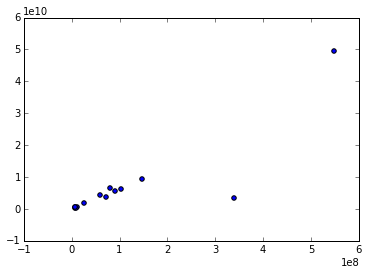

In [3]:
%matplotlib inline
plt.scatter(sugarwo,softdrinkswo)
plt.show()

Identify and remove outliers: Canada (The sugar consumption is quite high compared to the amount of soft drinks produced in Canada)

In [4]:
softdrinks = np.array([1.75E9,9.44E9,6.94E8,6.30E9,4.09E8,5.51E9,2.96E8,3.87E9,4.25E9,5.84E8,6.46E9,5.13E8])
sugar = np.array([2.62E7,1.46E8,1.02E7,1.03E8,6.82E6,9.00E7,8.78E6,7.22E7,5.90E7,7.54E6,8.03E7,6.18E6])

In [5]:
#Create linear regression object
regr = linear_model.LinearRegression()
#Train the model using the sets
regr.fit(sugar[:,np.newaxis],softdrinks)
#The coefficients
print('Coefficients:\n', regr.coef_)

Coefficients:
 [ 64.39976135]


1. We know that part of the sugar goes into other drinks.
2. The 64 kg sugar per L soft drink coefficient is too high, meaning that not all the sugar goes into soft drinks.  
3. The sugar rate per L beverage is supposed to be around 0.0028-0.042 kg /L beverage.

In [6]:
#The mean square error
print("Residual sum of squares: %.2f" % np.mean((regr.predict(sugar.reshape(-1,1))-softdrinks.reshape(-1,1))**2))
#Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(sugar.reshape(-1,1), softdrinks.reshape(-1,1)))

Residual sum of squares: 17186691703190654976.00
Variance score: 0.97


The variance obtained for the correlation between softdrinks and sugar is very close to 1; which confirms the sugar consumption in soft drinks. (linear relationship between sugar consumption and softdrinks)

//Users/marie/bw2-python/envs/bw2/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


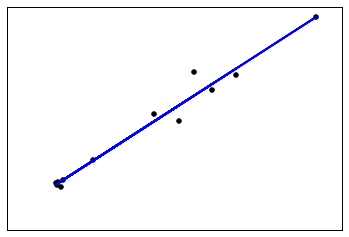

In [7]:
%matplotlib inline
plt.scatter(sugar,softdrinks, color='black')
plt.plot(sugar.reshape(-1,1),regr.predict(sugar.reshape(-1,1)), color='blue',linewidth=2)
plt.xticks(())
plt.yticks(())
plt.show()

### Distilled beverages

//Users/marie/bw2-python/envs/bw2/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


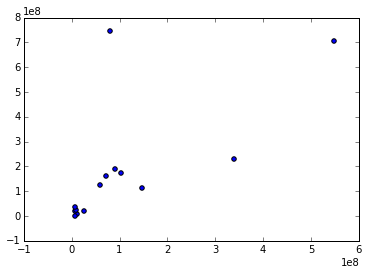

In [8]:
%matplotlib inline
plt.scatter(sugarwo,spiritswo)

Identify and remove outlier : United States (The volume of spirits produced is quite high and the sugar consumption quite low)

In [9]:
spirits = np.array([1.82E7,1.11E8,6.08E6,1.74E8,2.21E7,1.91E8,2.55E7,1.61E8,1.26E8,3.45E7,7.47E8,1.25E6])
sugar = np.array([2.62E7,1.46E8,1.02E7,1.03E8,6.82E6,9.00E7,8.78E6,7.22E7,5.90E7,7.54E6,8.03E7,6.18E6])

Coefficients:
 [ 1.97592402]
Residual sum of squares: 46608526139719480.00
Variance score: 0.21


//Users/marie/bw2-python/envs/bw2/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


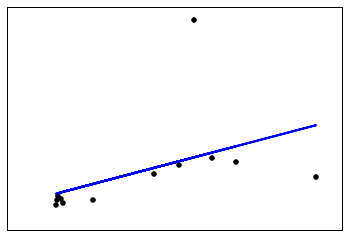

In [10]:
%matplotlib inline
#Create linear regression object
regr = linear_model.LinearRegression()
#Train the model using the sets
regr.fit(sugar[:,np.newaxis],spirits)
#The coefficients
print('Coefficients:\n', regr.coef_)
#The mean square error
print("Residual sum of squares: %.2f" % np.mean((regr.predict(sugar.reshape(-1,1))-spirits.reshape(-1,1))**2))
#Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(sugar.reshape(-1,1),spirits.reshape(-1,1)))
plt.scatter(sugar,spirits, color='black')
plt.plot(sugar.reshape(-1,1),regr.predict(sugar.reshape(-1,1)), color='blue',linewidth=2)
plt.xticks(())
plt.yticks(())
plt.show()

### Cider

//Users/marie/bw2-python/envs/bw2/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


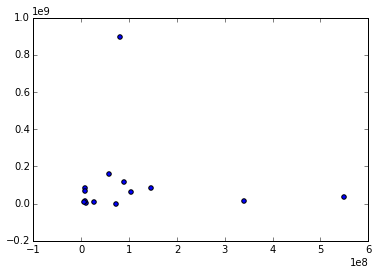

In [11]:
%matplotlib inline
plt.scatter(sugarwo,ciderwo)

Identify and remove outliers: United Kingdom (World's largest consumer of cider: http://greatist.com/health/beer-or-cider-healthier)

In [12]:
sugar = np.array([2.62E7,1.46E8,1.02E7,1.03E8,6.82E6,9.00E7,8.78E6,7.22E7,5.90E7,7.54E6,6.18E6])
cider = np.array([8.09E6,8.55E7,4.49E6,6.24E7,8.21E7,1.18E8,6.84E7,0,1.57E8,1.26E7,1.02E7])

Coefficients:
 [ 0.45345645]
Residual sum of squares: 2973515967616152.00
Variance score: 0.17


//Users/marie/bw2-python/envs/bw2/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


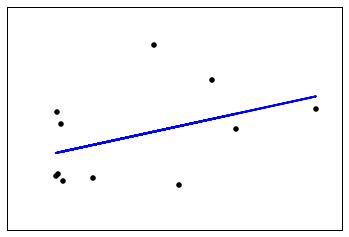

In [13]:
%matplotlib inline
#Create linear regression object
regr = linear_model.LinearRegression()
#Train the model using the sets
regr.fit(sugar[:,np.newaxis],cider)
#The coefficients
print('Coefficients:\n', regr.coef_)
#The mean square error
print("Residual sum of squares: %.2f" % np.mean((regr.predict(sugar.reshape(-1,1))-cider.reshape(-1,1))**2))
#Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(sugar.reshape(-1,1),cider.reshape(-1,1)))
plt.scatter(sugar,cider, color='black')
plt.plot(sugar.reshape(-1,1),regr.predict(sugar.reshape(-1,1)), color='blue',linewidth=2)
plt.xticks(())
plt.yticks(())
plt.show()

## 2. Resolution with least-square method 
Calculation of a pseudo-solution of the system using the Moore-Penrose pseudo-inverse.
https://en.wikipedia.org/wiki/Linear_least_squares_(mathematics)

In [65]:
from numpy import matrix
from scipy.linalg import pinv

In [67]:
# Matrix of the overdetermined system
volumes = matrix([[1.82E7,1.75E9], [1.11E8,9.44E9], [6.08E6, 6.94E8], [1.74E8,6.30E9],[2.21E7,4.09E8],[1.91E8,5.51E9],[2.55E7,2.96E8],[1.61E8,3.87E9],[1.26E8,4.25E9],[3.45E7,5.84E8], [7.47E8,6.46E9],[7.06E8,4.96E10],[1.25E6,5.13E8]])
print(volumes)

[[  1.82000000e+07   1.75000000e+09]
 [  1.11000000e+08   9.44000000e+09]
 [  6.08000000e+06   6.94000000e+08]
 [  1.74000000e+08   6.30000000e+09]
 [  2.21000000e+07   4.09000000e+08]
 [  1.91000000e+08   5.51000000e+09]
 [  2.55000000e+07   2.96000000e+08]
 [  1.61000000e+08   3.87000000e+09]
 [  1.26000000e+08   4.25000000e+09]
 [  3.45000000e+07   5.84000000e+08]
 [  7.47000000e+08   6.46000000e+09]
 [  7.06000000e+08   4.96000000e+10]
 [  1.25000000e+06   5.13000000e+08]]


In [68]:
# The second member
sugar=matrix([[2.62E7],[1.46E8],[1.02E7],[1.03E8],[6.82E6],[9.00E7],[8.78E6],[7.22E7],[5.90E7],[7.54E6],[8.03E7],[5.49E8],[6.18E6]])
print(sugar)

[[  2.62000000e+07]
 [  1.46000000e+08]
 [  1.02000000e+07]
 [  1.03000000e+08]
 [  6.82000000e+06]
 [  9.00000000e+07]
 [  8.78000000e+06]
 [  7.22000000e+07]
 [  5.90000000e+07]
 [  7.54000000e+06]
 [  8.03000000e+07]
 [  5.49000000e+08]
 [  6.18000000e+06]]


In [69]:
# Calculation of Moore-Penrose inverse
PIA=pinv(volumes)
print(PIA)

[[ -2.31666123e-11  -9.67016592e-11  -1.16946262e-11   1.55703400e-10
    3.39212827e-11   2.21740622e-10   4.55014850e-11   2.14920886e-10
    1.24035444e-10   5.49242371e-11   1.41287982e-09  -2.37472056e-10
   -1.57954080e-11]
 [  1.02858146e-12   5.08473442e-12   4.49042703e-13  -2.19845253e-13
   -4.04948376e-13  -1.59601052e-12  -6.36808873e-13  -2.09187111e-12
   -4.59981149e-13  -6.84672950e-13  -2.07858490e-11   2.22765735e-11
    4.49245971e-13]]


In [70]:
# Application to second member for pseudo solution
print (PIA*sugar)

[[ 0.02801424]
 [ 0.01097944]]


The solutions we obtain with the least square method are: 
- sugar rate in distilled beverages: 0.028 kg/L
- sugar rate in soft drinks: 0.011 kg/L

The sugar rate is higher for distilled beverages? (Is it because we removed soft drink Canada production which contains a lot of sugar?)

CCL: The least square method gives equal probability to the linear relationship between the sugar intake in distilled beverages or soft drinks.

### Resolution with the QR  decomposition vs least square method

In linear algebra, a QR decomposition (also called a QR factorization) of a matrix is a decomposition of a matrix A into a product A = QR of an orthogonal matrix Q and an upper triangular matrix R. QR decomposition is often used to solve the linear least squares problem.

The method of least squares is a standard approach in regression analysis to the approximate solution of overdetermined systems, i.e., sets of equations in which there are more equations than unknowns. "Least squares" means that the overall solution minimizes the sum of the squares of the errors made in the results of every single equation.

Different outliers were removed from the equations.

In [53]:
# When not removing any outliers from the equation
from numpy import *
# generating the overdetermined system
A = matrix([[1.82E7,1.75E9], [1.11E8,9.44E9], [6.08E6, 6.94E8], [1.74E8,6.30E9],[2.21E7,4.09E8],[1.91E8,5.51E9],[2.55E7,2.96E8],[1.61E8,3.87E9],[1.26E8,4.25E9],[3.45E7,5.84E8], [7.47E8,6.46E9],[7.06E8,4.96E10],[2.30E8,3.53E9],[1.25E6,5.13E8]])
b = matrix([[2.62E7],[1.46E8],[1.02E7],[1.03E8],[6.82E6],[9.00E7],[8.78E6],[7.22E7],[5.90E7],[7.54E6],[8.03E7],[5.49E8],[3.40E10],[6.18E6]])
x_lstsq = linalg.lstsq(A,b)[0] # computing the numpy solution
Q,R = linalg.qr(A) #qr decomposition of A
Qb = dot(Q.T,b) # computing Q^T*b (project b onto the range of A)
x_qr = linalg.solve(R,Qb) # solving R*x = Q^T*b
# comparing the solutions
print('qr solution')
print(x_qr)
print ('lstsq solution')
print(x_lstsq)

qr solution
[[ 12.06575166]
 [ -0.14499634]]
lstsq solution
[[ 12.06575166]
 [ -0.14499634]]


In [52]:
# When removing only Canada from the equation
from numpy import *
# generating the overdetermined system
A = matrix([[1.82E7,1.75E9], [1.11E8,9.44E9], [6.08E6, 6.94E8], [1.74E8,6.30E9],[2.21E7,4.09E8],[1.91E8,5.51E9],[2.55E7,2.96E8],[1.61E8,3.87E9],[1.26E8,4.25E9],[3.45E7,5.84E8], [7.47E8,6.46E9],[7.06E8,4.96E10],[1.25E6,5.13E8]])
b = matrix([[2.62E7],[1.46E8],[1.02E7],[1.03E8],[6.82E6],[9.00E7],[8.78E6],[7.22E7],[5.90E7],[7.54E6],[8.03E7],[5.49E8],[6.18E6]])
x_lstsq = linalg.lstsq(A,b)[0] # computing the numpy solution
Q,R = linalg.qr(A) #qr decomposition of A
Qb = dot(Q.T,b) # computing Q^T*b (project b onto the range of A)
x_qr = linalg.solve(R,Qb) # solving R*x = Q^T*b
# comparing the solutions
print('qr solution')
print(x_qr)
print ('lstsq solution')
print(x_lstsq)

qr solution
[[ 0.02801424]
 [ 0.01097944]]
lstsq solution
[[ 0.02801424]
 [ 0.01097944]]


In [50]:
#When removing only the United States from the equation
from numpy import *
# generating the overdetermined system
A = matrix([[1.82E7,1.75E9], [1.11E8,9.44E9], [6.08E6, 6.94E8], [1.74E8,6.30E9],[2.21E7,4.09E8],[1.91E8,5.51E9],[2.55E7,2.96E8],[1.61E8,3.87E9],[1.26E8,4.25E9],[3.45E7,5.84E8], [7.47E8,6.46E9],[2.30E8,3.53E9],[1.25E6,5.13E8]])
b = matrix([[2.62E7],[1.46E8],[1.02E7],[1.03E8],[6.82E6],[9.00E7],[8.78E6],[7.22E7],[5.90E7],[7.54E6],[8.03E7],[3.40E8],[6.18E6]])
x_lstsq = linalg.lstsq(A,b)[0] # computing the numpy solution
Q,R = linalg.qr(A) #qr decomposition of A
Qb = dot(Q.T,b) # computing Q^T*b (project b onto the range of A)
x_qr = linalg.solve(R,Qb) # solving R*x = Q^T*b
# comparing the solutions
print('qr solution')
print(x_qr)
print ('lstsq solution')
print(x_lstsq)

qr solution
[[ 0.047095 ]
 [ 0.0174003]]
lstsq solution
[[ 0.047095 ]
 [ 0.0174003]]


In [51]:
#When removing the United States and Canada from the equation
from numpy import *
# generating the overdetermined system
A = matrix([[1.82E7,1.75E9], [1.11E8,9.44E9], [6.08E6, 6.94E8], [1.74E8,6.30E9],[2.21E7,4.09E8],[1.91E8,5.51E9],[2.55E7,2.96E8],[1.61E8,3.87E9],[1.26E8,4.25E9],[3.45E7,5.84E8], [7.47E8,6.46E9],[1.25E6,5.13E8]])
b = matrix([[2.62E7],[1.46E8],[1.02E7],[1.03E8],[6.82E6],[9.00E7],[8.78E6],[7.22E7],[5.90E7],[7.54E6],[8.03E7],[6.18E6]])
x_lstsq = linalg.lstsq(A,b)[0] # computing the numpy solution
Q,R = linalg.qr(A) #qr decomposition of A
Qb = dot(Q.T,b) # computing Q^T*b (project b onto the range of A)
x_qr = linalg.solve(R,Qb) # solving R*x = Q^T*b
# comparing the solutions
print('qr solution')
print(x_qr)
print ('lstsq solution')
print(x_lstsq)

qr solution
[[-0.0301196 ]
 [ 0.01643281]]
lstsq solution
[[-0.0301196 ]
 [ 0.01643281]]


We can see that depending on the outliers we decide to remove from the over-determined system, the solutions obtained are extremely different.

## 3. Substantial uncertainties in the independant variable : fitting errors-in-variables models

The most important application is in data fitting. The best fit in the least-squares sense minimizes the sum of squared residuals, a residual being the difference between an observed value and the fitted value provided by a model. When the problem has substantial uncertainties in the independent variable (the x variable), then simple regression and least squares methods have problems; in such cases, the methodology required for fitting errors-in-variables models may be considered instead of that for least squares.

In statistics, errors-in-variables models or measurement error models are regression models that account for measurement errors in the independent variables. In contrast, standard regression models assume that those regressors have been measured exactly, or observed without error; as such, those models account only for errors in the dependent variables, or responses.

In the case when some regressors have been measured with errors, estimation based on the standard assumption leads to inconsistent estimates, meaning that the parameter estimates do not tend to the true values even in very large samples. For simple linear regression the effect is an underestimate of the coefficient, known as the attenuation bias.

Consider a simple linear regression model of the form

    y t = α + β x t ∗ + ε t , t = 1 , … , T , {\displaystyle y_{t}=\alpha +\beta x_{t}^{*}+\varepsilon _{t}\,,\quad t=1,\ldots ,T,} y_{t} = \alpha + \beta x_{t}^{*} + \varepsilon_t\,, \quad t=1,\ldots,T, 

where x t ∗ {\displaystyle x_{t}^{*}} x_{t}^{*} denotes the true but unobserved regressor. Instead we observe this value with an error:

    x t = x t ∗ + η t {\displaystyle x_{t}=x_{t}^{*}+\eta _{t}\,} x_{t} = x_{t}^{*} + \eta_{t}\, 

where the measurement error η t {\displaystyle \eta _{t}} \eta_{t} is assumed to be independent from the true value x t ∗ {\displaystyle x_{t}^{*}} x_{t}^{*}.

If the y t {\displaystyle y_{t}} y_{t}′s are simply regressed on the x t {\displaystyle x_{t}} x_{t}′s (see simple linear regression), then the estimator for the slope coefficient is

    β ^ = 1 T ∑ t = 1 T ( x t − x ¯ ) ( y t − y ¯ ) 1 T ∑ t = 1 T ( x t − x ¯ ) 2 , {\displaystyle {\hat {\beta }}={\frac {{\tfrac {1}{T}}\sum _{t=1}^{T}(x_{t}-{\bar {x}})(y_{t}-{\bar {y}})}{{\tfrac {1}{T}}\sum _{t=1}^{T}(x_{t}-{\bar {x}})^{2}}}\,,} \hat{\beta} = \frac{\tfrac{1}{T}\sum_{t=1}^T(x_t-\bar{x})(y_t-\bar{y})} {\tfrac{1}{T}\sum_{t=1}^T(x_t-\bar{x})^2}\,, 

which converges as the sample size T {\displaystyle T} T increases without bound:

    β ^ → p Cov ⁡ [ x t , y t ] Var ⁡ [ x t ] = β σ x ∗ 2 σ x ∗ 2 + σ η 2 = β 1 + σ η 2 / σ x ∗ 2 . {\displaystyle {\hat {\beta }}{\xrightarrow {p}}{\frac {\operatorname {Cov} [\,x_{t},y_{t}\,]}{\operatorname {Var} [\,x_{t}\,]}}={\frac {\beta \sigma _{x^{*}}^{2}}{\sigma _{x^{*}}^{2}+\sigma _{\eta }^{2}}}={\frac {\beta }{1+\sigma _{\eta }^{2}/\sigma _{x^{*}}^{2}}}\,.} \hat{\beta} \xrightarrow{p} \frac{\operatorname{Cov}[\,x_t,y_t\,]}{\operatorname{Var}[\,x_t\,]} = \frac{\beta \sigma^2_{x^*}} {\sigma_{x^*}^2 + \sigma_\eta^2} = \frac{\beta} {1 + \sigma_\eta^2/\sigma_{x^*}^2}\,. 

Variances are non-negative, so that in the limit the estimate is smaller in magnitude than the true value of β {\displaystyle \beta } \beta , an effect which statisticians call attenuation or regression dilution.[5] Thus the ‘naїve’ least squares estimator is inconsistent in this setting. However, the estimator is a consistent estimator of the parameter required for a best linear predictor of y {\displaystyle y} y given x {\displaystyle x} x: in some applications this may be what is required, rather than an estimate of the ‘true’ regression coefficient, although that would assume that the variance of the errors in observing x ∗ {\displaystyle x^{*}} x^{*} remains fixed. This follows directly from the result quoted immediately above, and the fact that the regression coefficient relating the y t {\displaystyle y_{t}} y_{t}′s to the actually observed x t {\displaystyle x_{t}} x_{t}′s, in a simple linear regression, is given by

    β x = Cov ⁡ [ x t , y t ] Var ⁡ [ x t ] . {\displaystyle \beta _{x}={\frac {\operatorname {Cov} [\,x_{t},y_{t}\,]}{\operatorname {Var} [\,x_{t}\,]}}.} \beta _{x}={\frac {\operatorname {Cov}[\,x_{t},y_{t}\,]}{\operatorname {Var}[\,x_{t}\,]}}.

It is this coefficient, rather than β {\displaystyle \beta } \beta , that would be required for constructing a predictor of y {\displaystyle y} y based on an observed x {\displaystyle x} x which is subject to noise.

It can be argued that almost all existing data sets contain errors of different nature and magnitude, so that attenuation bias is extremely frequent (although in multivariate regression the direction of bias is ambiguous. Jerry Hausman sees this as an iron law of econometrics: "The magnitude of the estimate is usually smaller than expected."

In [1]:
import numpy
from warnings import warn
from scipy.odr import __odrpack